<a href="https://colab.research.google.com/github/rajput97sim/netflix_movie_tv_clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size='15'>Project Summary</font><br>
The project's objective is to construct a clustering model for Netflix films and TV shows in order to enhance content recommendations and create personalized viewing experiences for users. This will be achieved through the application of machine learning and data analysis methods, enabling the identification of similar content based on diverse attributes such as genre, director, cast, and ratings.

The model will be trained on an extensive dataset encompassing Netflix titles, including details like title, genre, release year, duration, director, cast, and user ratings. To ensure data quality and consistency, a series of preprocessing techniques will be employed initially.

Following data preprocessing, various clustering algorithms will be explored and evaluated to determine the most appropriate approach for the dataset. Possible algorithms include k-means clustering, hierarchical clustering, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). The selection of the algorithm will be contingent on the dataset's characteristics and the desired clustering outcomes.

<font size='15'>**Problem Statement**</font><br>
This project aims to conduct clustering analysis on a comprehensive dataset comprising Netflix movies and TV shows. Netflix, as a prominent streaming platform, offers a vast array of content. By applying clustering techniques to this dataset, we intend to uncover commonalities among these shows and films, revealing hidden patterns and content categories within Netflix's extensive library.

<font size='6'>**The specific tasks to be performed in this project include:**</font>

1. Exploratory Data Analysis (EDA): This phase involves data cleaning, unwinding nested content, addressing missing values, and conducting an extensive analysis of the dataset. The objective is to unveil trends, correlations, and patterns across various attributes.

2. Assessing Content Availability: We will determine the types of content accessible in different countries and identify any regional variations or preferences in the Netflix library.

3. Analyzing Netflix's Content Emphasis: This project will investigate whether Netflix has placed a greater focus on TV shows compared to movies in recent years.

4. Clustering Similar Content: By harnessing text-based features, we will apply clustering techniques to group together content with similar characteristics, facilitating more effective content recommendations and enhancing user experiences.

<font size='15'>**General Guidelines : -**</font><br>
Well-structured, formatted, and commented code is required.

Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

    [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
              without a single error logged. ]

Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

# Chart visualization code
Why did you pick the specific chart?<br>
What is/are the insight(s) found from the chart?<br>
Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth? Justify with specific reason.<br>

You have to create at least 15 logical & meaningful charts having important insights.
[ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.
Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Cross- Validation & Hyperparameter Tuning

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

<font size='10'>**Importing libraries**</font>

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re

In [6]:
df1=pd.read_csv('/content/drive/MyDrive/Data/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Copy the data so that we can manipulate it

In [7]:
df=df1

In [8]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df.shape

(7787, 12)

<font size='3'>**There are 7787 rows and 12 columns in dataset.**</font>

In [12]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


<font size='3'>There are 7787 rows and 12 columns.</font>

In [13]:
df.duplicated().sum()

0

<font size='3'>**There are no duplicate column in dataset.**</font>

In [14]:
df.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

<font size='3'>There are missing values in dataset i.e <br>director:2389<br>cast:718<br>country:507<br>date_added:10<br>rating:7</font>

In [15]:
#null_value_percentage
null_value_percentage=(df.isnull().sum()/len(df))
null_value_percentage

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

<Axes: >

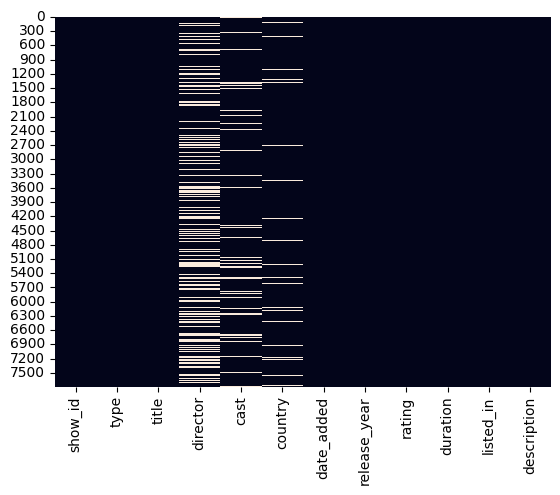

In [16]:
#visulation of null value in heatmap
sns.heatmap(df.isnull(),cbar=False)

<font size='15'>**Attribute Information**</font><br>
show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

<font size='10'>**Exploring column of dataset**</font>

In [17]:
df['show_id']

0          s1
1          s2
2          s3
3          s4
4          s5
        ...  
7782    s7783
7783    s7784
7784    s7785
7785    s7786
7786    s7787
Name: show_id, Length: 7787, dtype: object

In [18]:
df['show_id'].unique()

array(['s1', 's2', 's3', ..., 's7785', 's7786', 's7787'], dtype=object)

In [19]:
df['type']

0       TV Show
1         Movie
2         Movie
3         Movie
4         Movie
         ...   
7782      Movie
7783      Movie
7784      Movie
7785    TV Show
7786      Movie
Name: type, Length: 7787, dtype: object

In [20]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [21]:
df['title']

0                                            3%
1                                          7:19
2                                         23:59
3                                             9
4                                            21
                         ...                   
7782                                       Zozo
7783                                     Zubaan
7784                          Zulu Man in Japan
7785                      Zumbo's Just Desserts
7786    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, Length: 7787, dtype: object

In [22]:
df['title'].unique()

array(['3%', '7:19', '23:59', ..., 'Zulu Man in Japan',
       "Zumbo's Just Desserts", "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"],
      dtype=object)

In [23]:
df['director']

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

In [24]:
df['director'].unique()

array([nan, 'Jorge Michel Grau', 'Gilbert Chan', ..., 'Josef Fares',
       'Mozez Singh', 'Sam Dunn'], dtype=object)

In [25]:
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [26]:
df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                                  NaN
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

In [27]:
df['release_year']

0       2020
1       2016
2       2011
3       2009
4       2008
        ... 
7782    2005
7783    2015
7784    2019
7785    2019
7786    2019
Name: release_year, Length: 7787, dtype: int64

In [28]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [29]:
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7787, dtype: object

In [30]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

<font size='3'>Adult Content: TV-MA, NC-17, R<br>
Children Content: TV-PG, PG, TV-G, G<br>
Teen Content: PG-13, TV-14<br>
Family-friendly Content: TV-Y, TV-Y7, * TV-Y7-FV<br>
Not Rated: NR, UR<br>

In [31]:
#these rating are in abbrevative form,so to replace them with fullform
rating_des={'TV-MA':'Adult Content',
            'NC-17':'Adult Content',
            'R':'Adult Content',
            'TV-PG':'Children Content',
            'PG':'Children Content',
            'TV-G':'Children Content',
            'G':'Children Content',
            'PG-13':'Teen Content',
            'TV-14':'Teen Content',
            'TV-Y':'Family-friendly Content',
            'TV-Y7':'Family-friendly Content',
            '*TV-Y7-FV':'Family-friendly Content',
            'TV-Y7-FV':'Family-friendly Content',
            'NR':'Not Rated',
            'UR':'Not Rated'}
df['rating'].replace(rating_des,inplace=True)
df['rating'].unique()


array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content', nan], dtype=object)

<font size='10'>**Data Wranggling**</font>

<font size='3'>1.There is null values in dataset.so we have to fill the null values.<br>
2.Drop unnecesary column </font>

In [32]:
# to fill null value
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('not mention', axis=1)


In [33]:
#to fill null value in 'rating' with 'Not Rated'
df['rating']=df['rating'].fillna('Not Rated')

In [34]:
# drop the column
df['date_added']=df['date_added'].fillna('not mention')

In [35]:
#to check if there is any null value present or not
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<Axes: >

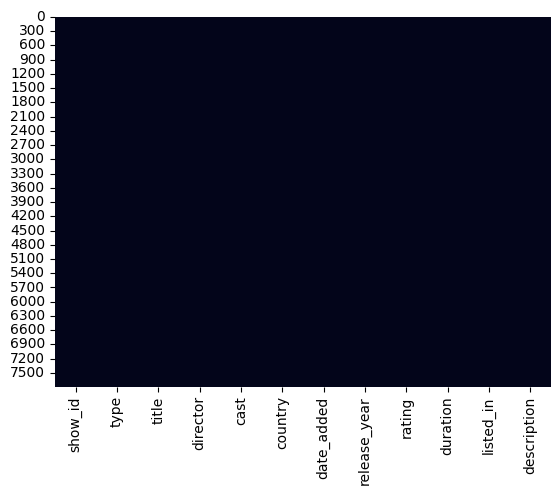

In [36]:
sns.heatmap(df.isnull(),cbar=False)

<font size='10'>**Exploratory Data Analysis**</font>

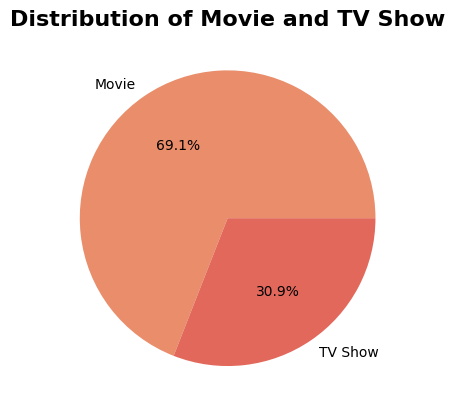

In [37]:
#Distribution of movie and TV Show
types=df['type'].value_counts()
plt.title('Distribution of Movie and TV Show',weight='bold',fontsize=16)
plt.pie(types,labels=types.index,autopct='%1.1f%%',colors=sns.color_palette('flare'))
plt.show()

<font size='3'> This dataset represent details of both movie and TV show. It's important to analysis both the data differently.</font>

Why did you pick the specific chart?<br>
Pie chart represent who individual part contribute to whole.<br><br>
What is/are the insight(s) found from the chart?<br>
69.1% of dataset contain detail of movie.<br><br>
Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.<br>
Netflix effectively curates its content library by adjusting the balance between TV shows and movies in response to customer preferences.TV Show is less as compare to movie .Netfix can add or delete the data according to customer preference

In [38]:
#Divide dataset into df_movie and df_tv_show
df_movie=df[df['type']=='Movie']
df_tv_show=df[df['type']=='TV Show']

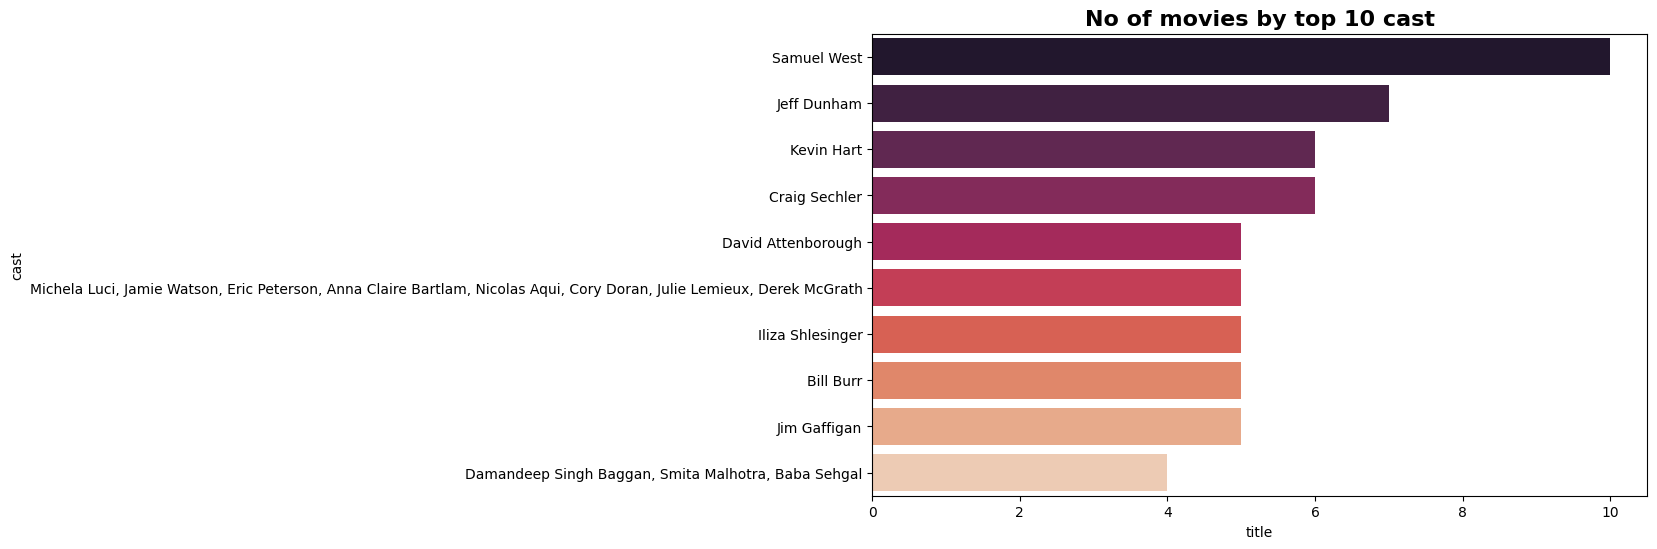

In [39]:
top_cast_movie=df_movie.groupby('cast')['title'].nunique().reset_index().sort_values(by='title',ascending=False)[1:11]
plt.figure(figsize=(10,6))
plt.title('No of movies by top 10 cast',weight='bold',fontsize=16)
plt.xlabel('no of movie')
plt.ylabel('cast')
sns.barplot(data=top_cast_movie,x='title',y='cast',palette='rocket')
plt.show()


Why did you pick the specific chart?<br>
The length of each bar represents a value, making it easy to see and compare the differences between categories.<br><br>
What is/are the insight(s) found from the chart?<br>
Samuel West has highest no of movies in dataset.
Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.<br>
Customer is obsessed with popular actor and they prefer their movie.

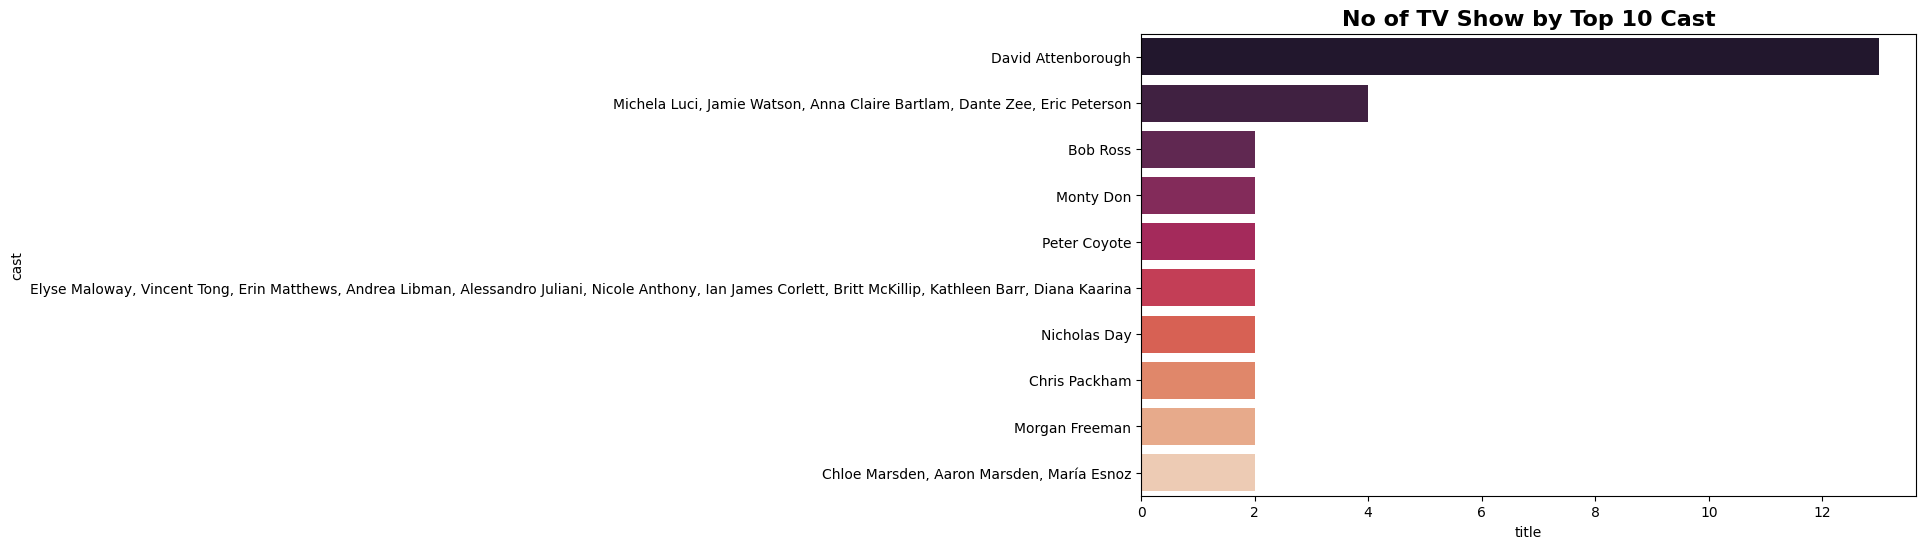

In [40]:
#top 10 cast of tv show
top_cast_tv_show=df_tv_show.groupby('cast')['title'].nunique().reset_index().sort_values(by='title',ascending=False)[1:11]
plt.figure(figsize=(10,6))
plt.title('No of TV Show by Top 10 Cast',weight='bold',fontsize=16)
plt.xlabel('no of TV Show')
plt.ylabel('cast')
sns.barplot(data=top_cast_tv_show,x='title',y='cast',palette='rocket')
plt.show()

Why did you pick the specific chart?<br>
The length of each bar represents a value, making it easy to see and compare the differences between categories.<br><br>
What is/are the insight(s) found from the chart?<br>
David Attenborough has highest no of movies in dataset.
Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.<br>
Customer is obsessed with popular actor and they prefer their TV Shows.David Attenborough TV Show are high in demand.To engage more customer,David Attenborough TV Shows should be prefer

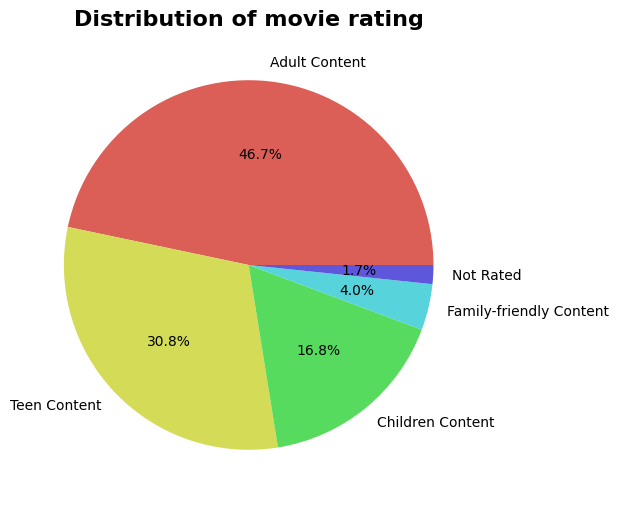

In [41]:
k=df_movie['rating'].value_counts()
plt.figure(figsize=(10,6))
plt.title('Distribution of movie rating',weight='bold',fontsize=16)
plt.pie(k,labels=k.index,autopct='%1.1f%%',colors=sns.color_palette('hls'))
plt.show()


Why did you pick the specific chart?<br>
Pie chart show the part of whole.In this it show part of rating of dataset<br><br>
What is/are the insight(s) found from the chart?<br>
Customer prefer more adult content ie.46% of dataset which is approx half of dataset.<br>
Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.<br>
From the above graph,it is clear that max customer is above 13 year.to have more business impact,more focus should be on adult and teen content.

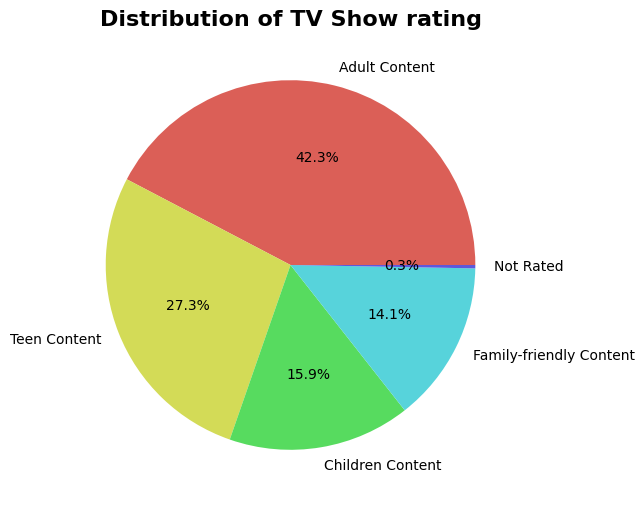

In [42]:
k=df_tv_show['rating'].value_counts()
plt.figure(figsize=(10,6))
plt.title('Distribution of TV Show rating',weight='bold',fontsize=16)
plt.pie(k,labels=k.index,autopct='%1.1f%%',colors=sns.color_palette('hls'))
plt.show()

Why did you pick the specific chart?<br>
Pie chart show the part of whole.In this it show part of rating of dataset<br><br>
What is/are the insight(s) found from the chart?<br>
Customer prefer more adult content ie.42% of dataset which is approx half of dataset.<br>
Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.<br>
From the above graph,it is clear that max customer is above 13 year.to have more business impact,more focus should be on adult and teen content.

<font size='5'>**Top 10 director**</font>

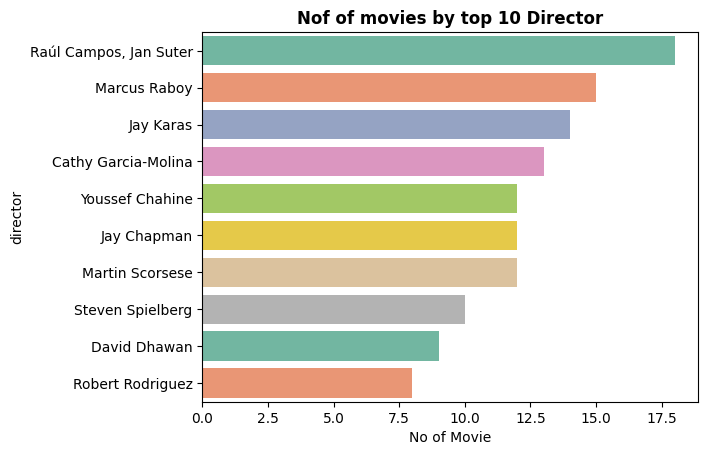

In [43]:
top_director_movie=df_movie.groupby('director')['title'].nunique().reset_index().sort_values(by='title',ascending=False)[1:11]
plt.title('Nof of movies by top 10 Director',weight='bold')

sns.barplot(data=top_director_movie,x='title',y='director',palette='Set2')
plt.xlabel('No of Movie')
plt.show()


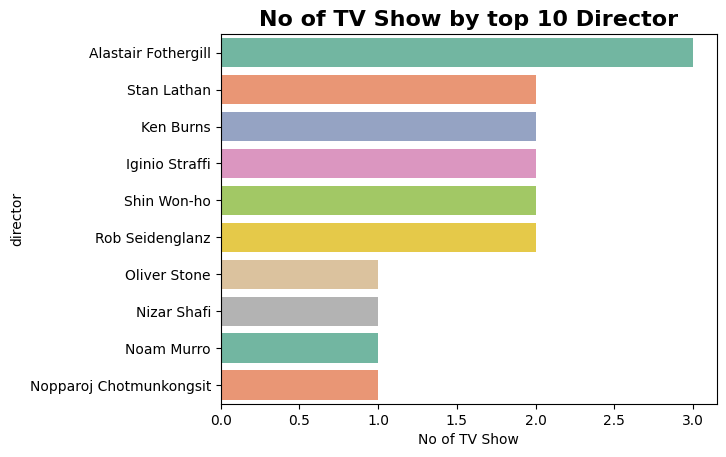

In [44]:
top_director_tv_show=df_tv_show.groupby('director')['title'].nunique().reset_index().sort_values(by='title',ascending=False)[1:11]
plt.title('No of TV Show by top 10 Director',weight='bold',fontsize=16)

sns.barplot(data=top_director_tv_show,x='title',y='director',palette='Set2')
plt.xlabel('No of TV Show')
plt.show()

<font size='5'>**Top 15 country**</font>

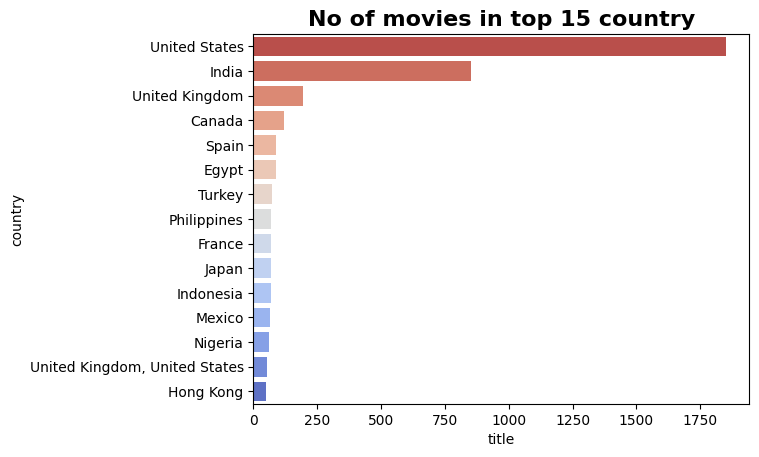

In [45]:
df_movie=df_movie[df_movie['country']!='not mention']
top_country_movie=df_movie.groupby('country')['title'].nunique().reset_index().sort_values(by='title',ascending=False)[0:15]
plt.title('No of movies in top 15 country',weight='bold',fontsize=16)
plt.xlabel('No of movie')
sns.barplot(data=top_country_movie,x='title',y='country',palette='coolwarm_r')

plt.show()

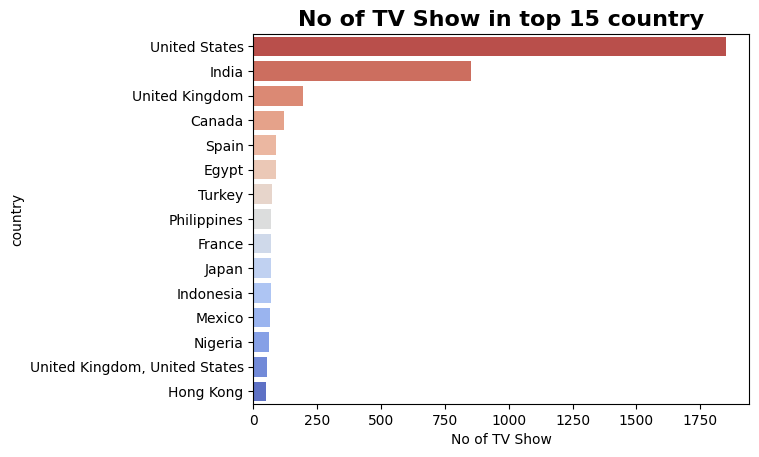

In [46]:
df_tv_show=df_tv_show[df_tv_show['country']!='not mention']
top_country_tv_show=df_tv_show.groupby('country')['title'].nunique().reset_index().sort_values(by='title',ascending=False)[0:15]

sns.barplot(data=top_country_movie,x='title',y='country',palette='coolwarm_r')
plt.title('No of TV Show in top 15 country',weight='bold',fontsize=16)
plt.xlabel('No of TV Show')

plt.show()

Why did you pick the specific chart?<br>
Bar chart is used as length represent no of movie or tv show produce in the country.<br><br>
What is/are the insight(s) found from the chart?<br>
USA has hightest no of movie and TV show produce.USA has more than 1750+ produce while other country from top 15 has less than 250 produce<br><br>
Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.<br>Movie and TV Show produce in USA create a huge market for netflix.

<font size='5'>**Release year**</font>

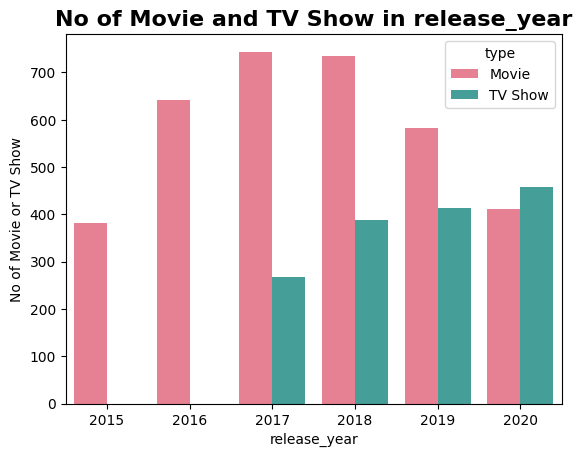

In [47]:
r=df.groupby(['release_year','type'])['title'].nunique().reset_index().sort_values(by=['title'],ascending=False)[0:10]

sns.barplot(x = 'release_year',y= 'title',hue='type', data = r, palette='husl')
plt.title('No of Movie and TV Show in release_year',weight='bold',fontsize=16)
plt.ylabel('No of Movie or TV Show')
plt.show()

<font size='5'>

Why did you pick the specific chart?<br>
The length of bar in bar garph specify the relation between movie and TV Show.<br><br>
What is/are the insight(s) found from the chart?<br>
THere are more TV Show release from 2017 and huge decrease of movie release.<br>
Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.<br>
Customer are more intrested in TV Show rather than 2 hour long movie.

<font size='8'>**Genre**</font>

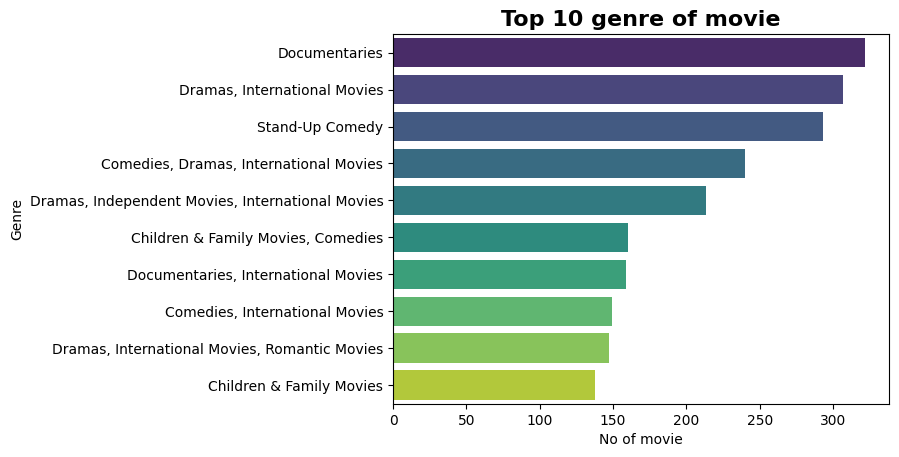

In [48]:
genre_movie=df_movie.groupby('listed_in')['title'].nunique().reset_index().sort_values(by='title',ascending=False)[0:10]

sns.barplot(y='listed_in',x='title',data=genre_movie,palette='viridis')
plt.title('Top 10 genre of movie',weight='bold',fontsize='16')
plt.ylabel('Genre')
plt.xlabel('No of movie')
plt.show()

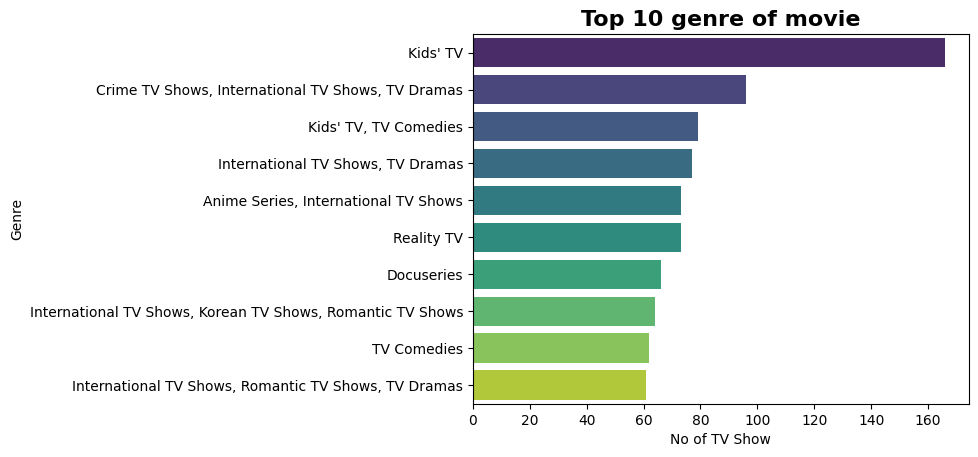

In [49]:
genre_tv=df_tv_show.groupby('listed_in')['title'].nunique().reset_index().sort_values(by='title',ascending=False)[0:10]

sns.barplot(y='listed_in',x='title',data=genre_tv,palette='viridis')
plt.title('Top 10 genre of movie',weight='bold',fontsize='16')
plt.ylabel('Genre')
plt.xlabel('No of TV Show')
plt.show()

<ipython-input-50-e54b0c06de9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_['year_added'] = date_['date_added'].str.extract(r'(\d{4})')


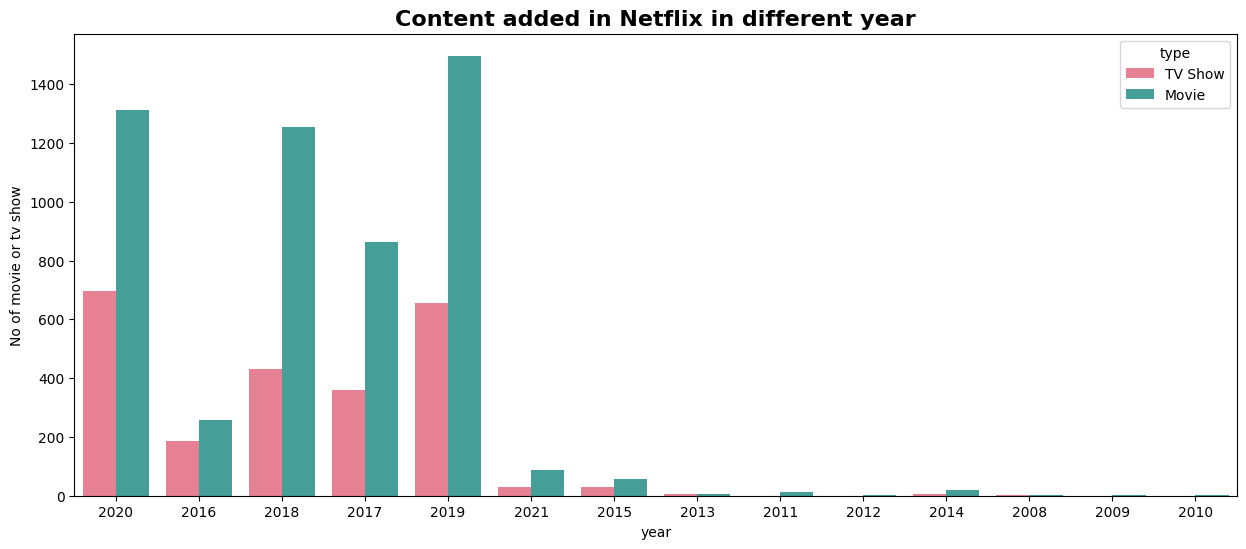

In [50]:


# Assuming you have a DataFrame named df
date_ = df[df['date_added'] != 'not mention']

# Create a new column 'year_added' by extracting the year using regular expressions
date_['year_added'] = date_['date_added'].str.extract(r'(\d{4})')
plt.figure(figsize=(15,6))
sns.countplot(data=date_,x='year_added',hue='type',palette='husl')
plt.title('Content added in Netflix in different year',weight='bold',fontsize='16')
plt.xlabel('year')
plt.ylabel('No of movie or tv show')
plt.show()

<ipython-input-51-273470513892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_['month_added'] = date_['date_added'].str.extract(r'(^[a-zA-Z]{4,})')


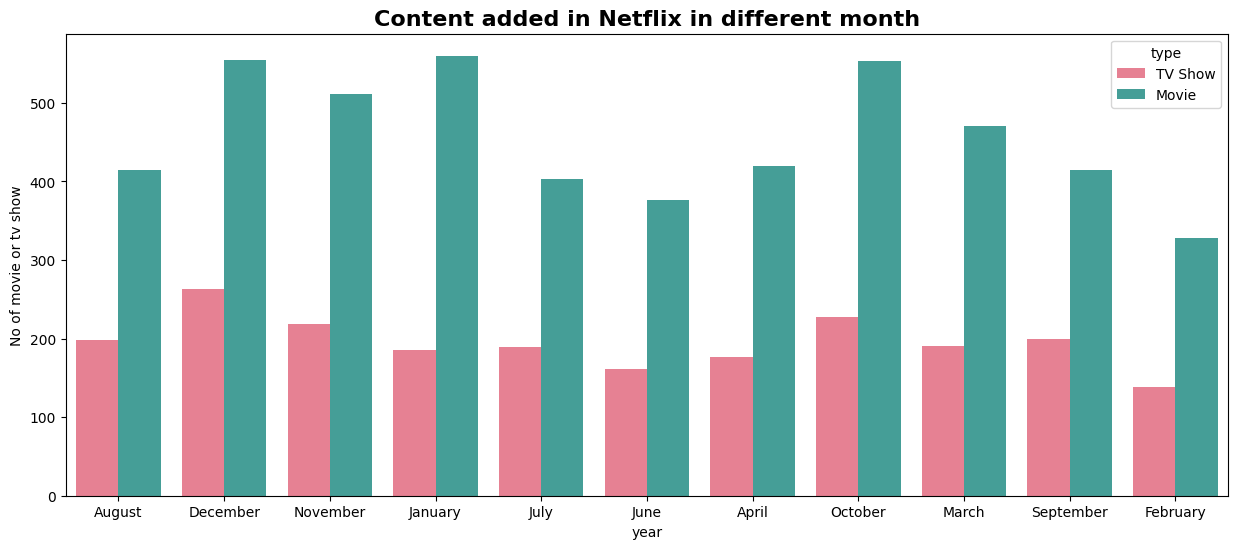

In [51]:
date_['month_added'] = date_['date_added'].str.extract(r'(^[a-zA-Z]{4,})')
plt.figure(figsize=(15,6))
sns.countplot(data=date_,x='month_added',hue='type',palette='husl')
plt.title('Content added in Netflix in different month',weight='bold',fontsize='16')
plt.xlabel('year')
plt.ylabel('No of movie or tv show')
plt.show()

In [52]:

df1['tag']=df1['listed_in']+df1['description']

In [53]:
df1['tag']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Name: tag, Length: 7787, dtype: object

<font size='5'>**Preprocessing**</font>

In [54]:
nlp=spacy.load('en_core_web_sm')

<font size='5'>**Remove stop word**</font>

In [55]:
def remove_stopwords_punct(text):
  text=text.lower()
  doc=nlp(text)
  a=[]
  for word in doc:
    if not word.is_stop and not word.is_punct :
      a.append(word.lemma_)
  return (' '.join(a))

In [56]:
df['tag_stopwords']=df['tag'].apply(remove_stopwords_punct)

In [57]:
df['tag_stopwords'][10]

'drama thrillersa farmer pen confession admit wife murder death beginning macabre tale base stephen king novella'

<font size='5'>**Remove Url**</font>

In [58]:


# Import regex library
import re

def remove_URL(text):
  return re.sub(r'https?://\S+|www\.\S+', '', text)

# Apply the remove_URL function to each instance in variable no_sw_pun_description
df['tag_url']=df['tag_stopwords'].apply(remove_URL)
df['tag_url'][20]

'drama independent movie international moviesafter accidentally connect internet stranger form tight friendship know share bond'

<font size='5'>**Remove emails**</font>

In [59]:
def remove_emails(text):
    text_split = text.split()
    return ' '.join([i for i in text_split if '@' not in i])

# Apply the remove_emails function to each instance in variable clean_description
df['tag_email']=df['tag_url'].apply(remove_emails)


In [60]:
df['tag_email'][15]

'drama international movie thrillersagainst backdrop nigeria loom independence britain detective danladi waziri race capture killer terrorize local woman'

In [61]:
X=df['tag_email']

<font size='5'>**TfidVectorizer**</font>

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=20000)

# Fit and transform your text data
X=tfidf_vectorizer.fit_transform(X)

# X now contains the TF-IDF vectors representing your text data


In [63]:
print(X.shape)

(7787, 16852)


In [64]:
print(X.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.21364362 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [65]:
X_arr=X.toarray()

In [66]:
from sklearn.decomposition import TruncatedSVD

# Initialize TruncatedSVD with the desired number of components
n_components = 2  # Adjust as needed
svd = TruncatedSVD(n_components=n_components, random_state=42)

# Fit and transform your sparse matrix X
X_svd = svd.fit_transform(X)

# X_svd now contains the reduced-dimensional representation of your data


<font size='10'>K Means Clustering</font>

In [67]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

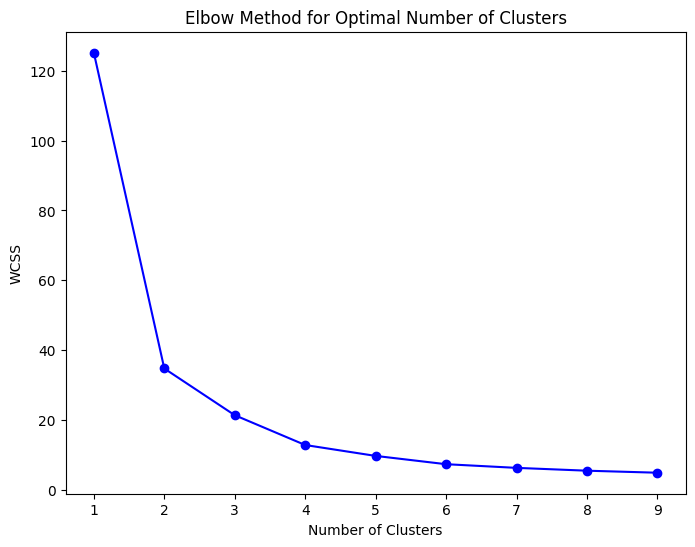

In [68]:

wcss = []
for k in range(1,10):
    km = KMeans(n_clusters=k,init='k-means++')
    km.fit(X_svd)
    wcss.append(km.inertia_)
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
plt.plot(range(1, 10), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

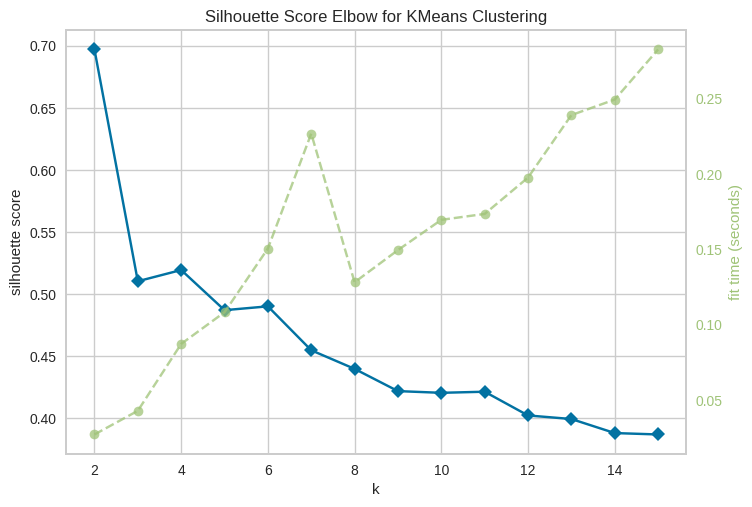

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [69]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model=KMeans()

visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X_svd)

# visualise the k value
visualizer.show()

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for i in range(2,8):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_svd)
  y_kmeans= kmeans.predict(X_svd)
  label=kmeans.labels_

  silhouette_avg=silhouette_score(X_svd,label)
  print('silhouette_score for ',i,'cluster is',silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_score for  2 cluster is 0.6970780385412534


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_score for  3 cluster is 0.5107914745769233


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_score for  4 cluster is 0.5194821337454988


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_score for  5 cluster is 0.487010525932019


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_score for  6 cluster is 0.4898548471206376


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_score for  7 cluster is 0.45412481892878276


In [71]:


# Create a copy of the dataset
kmeans_df = df.copy()

# Initialize and fit K-means clustering
kmeans = KMeans(n_clusters=2)  # You can adjust the number of clusters as needed
kmeans.fit(X_svd)  # Assuming X_svd contains your data for clustering

# Add cluster assignments to the copy of the dataset
kmeans_df['cluster'] = kmeans.labels_

# Now, kmeans_df contains your original data with the 'cluster' column indicating the cluster assignments


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(X_svd,label)
print('silhoue',silhouette_avg)

In [73]:
kmeans_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tag,tag_stopwords,tag_url,tag_email,cluster
0,s1,TV Show,3%,not mention,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,"International TV Shows, TV Dramas, TV Sci-Fi &...",international tv show tv drama tv sci fi fanta...,international tv show tv drama tv sci fi fanta...,international tv show tv drama tv sci fi fanta...,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,"Dramas, International MoviesAfter a devastatin...",drama international moviesafter devastating ea...,drama international moviesafter devastating ea...,drama international moviesafter devastating ea...,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...","Horror Movies, International MoviesWhen an arm...",horror movie international movieswhen army rec...,horror movie international movieswhen army rec...,horror movie international movieswhen army rec...,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...","Action & Adventure, Independent Movies, Sci-Fi...",action adventure independent movie sci fi fant...,action adventure independent movie sci fi fant...,action adventure independent movie sci fi fant...,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,DramasA brilliant group of students become car...,dramasa brilliant group student card count exp...,dramasa brilliant group student card count exp...,dramasa brilliant group student card count exp...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,Adult Content,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,"Dramas, International MoviesWhen Lebanon's Civ...",drama international movieswhen lebanon civil w...,drama international movieswhen lebanon civil w...,drama international movieswhen lebanon civil w...,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,Teen Content,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,"Dramas, International Movies, Music & Musicals...",drama international movie music musicalsa scra...,drama international movie music musicalsa scra...,drama international movie music musicalsa scra...,0
7784,s7785,Movie,Zulu Man in Japan,not mention,Nasty C,not mention,"September 25, 2020",2019,Adult Content,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...","Documentaries, International Movies, Music & M...",documentary international movie music musicals...,documentary international movie music musicals...,documentary international movie music musicals...,0
7785,s7786,TV Show,Zumbo's Just Desserts,not mention,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,Children Content,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,"International TV Shows, Reality TVDessert wiza...",international tv show reality tv

In [ ]:
sns.countplot(data=kmeans_df,x='cluster',hue='type')

In [ ]:
# Building a dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X_svd, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.0375, min_samples=3)
dbscan.fit(X_svd)
y_dbscan=dbscan.labels_

In [ ]:
y_dbscan

In [78]:
n_clusters_=len(set(y_dbscan))-(1 if -1 in y_dbscan else 0)
print(n_clusters_)

1


In [ ]:
#copy dataset for dbscan
dbscan_df=df.copy()
dbscan_df['cluster']=dbscan.labels_

In [ ]:
dbscan_df

In [ ]:
sns.countplot(data=dbscan_df,x='cluster',hue='type')